In [64]:
import pandas as pd
import numpy as np
import requests
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression




In [2]:
vac = pd.read_csv("data/2000-2015 CAKindergartenData.csv")


C:\Users\qcsbo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create new dataframe with info needed to calculat Perusiss vaccination rate for each county by year

dtp_df = vac[['Year', 'COUNTY', 'ENROLLMENT', 'DTP#']]
dtp_df = dtp_df[dtp_df['Year'] != 2000]
dtp_df.head()

,Year,COUNTY,ENROLLMENT,DTP#
7418,2001,ALAMEDA,12,12
7419,2001,ALAMEDA,78,77
7420,2001,ALAMEDA,77,76
7421,2001,ALAMEDA,56,54
7422,2001,ALAMEDA,41,41


In [4]:
dtp_df[dtp_df["ENROLLMENT"] == " "]["ENROLLMENT"].count()

1366

In [5]:
dtp_df.shape

(110383, 4)

In [6]:
dtp_df = dtp_df[dtp_df["ENROLLMENT"] != " "]
dtp_df[dtp_df["ENROLLMENT"] == " "]["ENROLLMENT"].count()

dtp_df["ENROLLMENT"] = pd.to_numeric(dtp_df["ENROLLMENT"])
dtp_df.shape

(109017, 4)

In [7]:
dtp_df[dtp_df['DTP#'] == " "].count()
dtp_df['DTP#'] = pd.to_numeric(dtp_df['DTP#'])
# dtp_df.dtypes

In [8]:
# sum up enrollement and vaccination numbers by year and county

dtp_summed_df = dtp_df.groupby(['Year','COUNTY']).sum()
dtp_summed_df['cnty_vac_rate'] = 0
dtp_summed_df.head(10)

dtp_summed_df.shape

(868, 3)

In [9]:
dtp_summed_df['cnty_vac_rate'] = dtp_summed_df['DTP#']/dtp_summed_df['ENROLLMENT'] * 100

dtp_summed_df.head(10)

ENROLLMENT     DTP#  cnty_vac_rate
Year COUNTY                                          
2001 ALAMEDA          19392.0  18332.0      94.533828
     AMADOR             345.0    336.0      97.391304
     BUTTE             2508.0   2358.0      94.019139
     CALAVERAS          399.0    373.0      93.483709
     COLUSA             322.0    315.0      97.826087
     CONTRA COSTA     13544.0  13055.0      96.389545
     DEL NORTE          298.0    292.0      97.986577
     EL DORADO         2059.0   1942.0      94.317630
     FRESNO           14320.0  13932.0      97.290503
     GLENN              418.0    411.0      98.325359

In [10]:
pop_df = pd.read_csv("data/CA County Population Over Time All.csv", header=None)
pop_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,table with row headers in column A and column ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,NaN,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,California,"33,871,653","33,987,977","34,479,458","34,871,843","35,253,159","35,574,576","35,827,943","36,021,202","36,250,311",...,"36,961,229","37,254,518","37,327,690","37,672,654","38,019,006","38,347,383","38,701,278","39,032,444","39,296,476","39,459,622"
3,.Alameda County,"1,443,705","1,449,840","1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715",...,"1,498,539","1,510,261","1,513,402","1,532,215","1,556,648","1,582,936","1,611,572","1,637,141","1,653,236","1,663,190"
4,.Alpine County,"1,206","1,209","1,196","1,237","1,233","1,263","1,219","1,276","1,274",...,"1,197","1,175","1,161","1,093","1,110","1,127","1,084","1,088","1,057","1,120"


In [11]:
pop_df.index
pop_df.shape

(61, 21)

In [12]:
pop_df = pop_df[1:]

pop_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,Geographic Area,NaN,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,California,"33,871,653","33,987,977","34,479,458","34,871,843","35,253,159","35,574,576","35,827,943","36,021,202","36,250,311",...,"36,961,229","37,254,518","37,327,690","37,672,654","38,019,006","38,347,383","38,701,278","39,032,444","39,296,476","39,459,622"
3,.Alameda County,"1,443,705","1,449,840","1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715",...,"1,498,539","1,510,261","1,513,402","1,532,215","1,556,648","1,582,936","1,611,572","1,637,141","1,653,236","1,663,190"
4,.Alpine County,"1,206","1,209","1,196","1,237","1,233","1,263","1,219","1,276","1,274",...,"1,197","1,175","1,161","1,093","1,110","1,127","1,084","1,088","1,057","1,120"
5,.Amador County,"35,101","35,153","35,697","36,561","36,994","37,400","38,040","38,353","38,756",...,"38,238","38,091","37,884","37,539","37,112","36,635","36,748","37,047","37,473","38,626"


In [13]:
pop_df.loc[0:1, 0] = "COUNTY"
pop_df.loc[0:1, 1] = '1999'
pop_df.iloc[0]
pop_df.columns = pop_df.iloc[0]
pop_df = pop_df[2:]
pop_df.head()


1,COUNTY,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,.Alameda County,"1,443,705","1,449,840","1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715",...,"1,498,539","1,510,261","1,513,402","1,532,215","1,556,648","1,582,936","1,611,572","1,637,141","1,653,236","1,663,190"
4,.Alpine County,"1,206","1,209","1,196","1,237","1,233","1,263","1,219","1,276","1,274",...,"1,197","1,175","1,161","1,093","1,110","1,127","1,084","1,088","1,057","1,120"
5,.Amador County,"35,101","35,153","35,697","36,561","36,994","37,400","38,040","38,353","38,756",...,"38,238","38,091","37,884","37,539","37,112","36,635","36,748","37,047","37,473","38,626"
6,.Butte County,"203,125","203,807","206,193","209,120","211,481","213,065","214,752","216,824","217,469",...,"219,777","220,002","219,957","220,003","220,969","221,768","223,629","224,818","226,525","229,294"
7,.Calaveras County,"40,535","40,645","41,304","42,380","43,755","44,530","45,295","46,045","46,268",...,"45,900","45,578","45,470","45,163","44,826","44,667","44,677","44,954","45,315","45,670"


In [14]:
pop_df.drop(["1999", "2000", "2016", "2017", "2018"], axis=1, inplace=True )

In [15]:
pop_df["COUNTY"] = pop_df["COUNTY"].str.split(' County', expand=True)
pop_df["COUNTY"] = pop_df["COUNTY"].str.split('.', expand=True)[1]
pop_df["COUNTY"] = pop_df["COUNTY"].str.split(' County', expand=True)[0]


In [16]:
pop_df['COUNTY'] = pop_df['COUNTY'].str.upper()

pop_df.head()

1,COUNTY,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3,ALAMEDA,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539","1,510,261","1,513,402","1,532,215","1,556,648","1,582,936","1,611,572"
4,ALPINE,"1,196","1,237","1,233","1,263","1,219","1,276","1,274","1,202","1,197","1,175","1,161","1,093","1,110","1,127","1,084"
5,AMADOR,"35,697","36,561","36,994","37,400","38,040","38,353","38,756","38,248","38,238","38,091","37,884","37,539","37,112","36,635","36,748"
6,BUTTE,"206,193","209,120","211,481","213,065","214,752","216,824","217,469","219,034","219,777","220,002","219,957","220,003","220,969","221,768","223,629"
7,CALAVERAS,"41,304","42,380","43,755","44,530","45,295","46,045","46,268","46,265","45,900","45,578","45,470","45,163","44,826","44,667","44,677"


In [17]:
long_df = pd.melt(pop_df, id_vars=['COUNTY'], value_name = 'population')

In [18]:
long_df[1] = long_df[1].astype('int64')
print(long_df.dtypes)
long_df[1]
long_df.head()
# int(a.replace(',' , ''))

COUNTY        object
1              int64
population    object
dtype: object


,COUNTY,1,population
0,ALAMEDA,2001,"1,469,484"
1,ALPINE,2001,"1,196"
2,AMADOR,2001,"35,697"
3,BUTTE,2001,"206,193"
4,CALAVERAS,2001,"41,304"


In [19]:
long_df.set_index([1, 'COUNTY'], inplace=True)

In [20]:
new_df = pd.merge(dtp_summed_df, long_df,  how='left', left_on=['Year','COUNTY'], right_on = [1,'COUNTY'])

new_df.head()

ENROLLMENT     DTP#  cnty_vac_rate population
Year COUNTY                                                  
2001 ALAMEDA       19392.0  18332.0      94.533828  1,469,484
     AMADOR          345.0    336.0      97.391304     35,697
     BUTTE          2508.0   2358.0      94.019139    206,193
     CALAVERAS       399.0    373.0      93.483709     41,304
     COLUSA          322.0    315.0      97.826087     19,022

In [21]:
new_df['population'] = new_df['population'].str.replace(',', '')
new_df['population'] = new_df['population'].astype(float)

new_df.head()

ENROLLMENT     DTP#  cnty_vac_rate  population
Year COUNTY                                                   
2001 ALAMEDA       19392.0  18332.0      94.533828   1469484.0
     AMADOR          345.0    336.0      97.391304     35697.0
     BUTTE          2508.0   2358.0      94.019139    206193.0
     CALAVERAS       399.0    373.0      93.483709     41304.0
     COLUSA          322.0    315.0      97.826087     19022.0

In [22]:
url="https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=a7a4d868-f6d2-49c9-8a11-904c69a0e3a0&limit=8000"

response = requests.get(url)
response_json = response.json()

records = response_json['result']['records']

In [23]:
outbreak_df = pd.DataFrame(records)
outbreak_df = outbreak_df[outbreak_df['disease'] == 'Pertussis'][['count', 'county', 'year']]
outbreak_df = outbreak_df[(outbreak_df['year'] != '2016') & (outbreak_df['year'] != '2017')]
outbreak_df.head()



,count,county,year
4720,20,Alameda,2001
4721,45,Alameda,2002
4722,44,Alameda,2003
4723,84,Alameda,2004
4724,122,Alameda,2005


In [24]:
outbreak_df['year'] = outbreak_df['year'].astype('int64')
outbreak_df['county'] = outbreak_df['county'].str.upper()

outbreak_df.set_index(['year', 'county'], inplace=True)

In [54]:
final_df = new_df.merge(outbreak_df, left_on=['Year', 'COUNTY'], right_index=True)
final_df['outbreak%'] = final_df['count']/final_df['population'] *10000
outbreak_years.head()

,ENROLLMENT,DTP#,cnty_vac_rate,population,count,outbreak%
COUNTY,,,,,,
ALAMEDA,17721.0,16559.0,93.442808,1510261.0,436,2.886918
AMADOR,311.0,298.0,95.819936,38091.0,4,1.050117
BUTTE,2497.0,2252.0,90.188226,220002.0,32,1.454532
CALAVERAS,394.0,311.0,78.934010,45578.0,9,1.974637
COLUSA,369.0,360.0,97.560976,21419.0,11,5.135627


In [48]:
X = final_df[['cnty_vac_rate']]
y = final_df['outbreak%'].values.reshape(-1, 1)
X.shape

(858, 1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


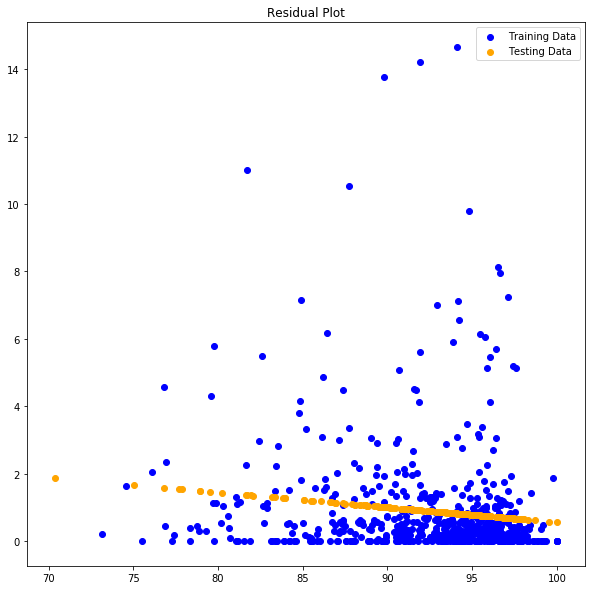

In [51]:
plt.scatter(X_train, y_train, c="blue", label="Training Data")
plt.scatter(X_test, predictions, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [52]:
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.6370904818835648, R2: -0.004111151737405061


In [53]:
outbreak_years = final_df.loc[2010]
print(outbreak_years.shape)
outbreak_years = outbreak_years.append(final_df.loc[2014])
print(outbreak_years.shape)


(57, 6)
(114, 6)


In [93]:
final_df['outbreak_y_n'] = final_df['outbreak%'].apply(lambda x: 1 if x > 1 else 0 )
final_df.head()

ENROLLMENT     DTP#  cnty_vac_rate  population  count  \
Year COUNTY                                                             
2001 ALAMEDA       19392.0  18332.0      94.533828   1469484.0     20   
     AMADOR          345.0    336.0      97.391304     35697.0      1   
     BUTTE          2508.0   2358.0      94.019139    206193.0      0   
     CALAVERAS       399.0    373.0      93.483709     41304.0      2   
     COLUSA          322.0    315.0      97.826087     19022.0      0   

                outbreak%  outbreak_thresh  outbreak_y_n  class  
Year COUNTY                                                      
2001 ALAMEDA     0.136102                0             0      0  
     AMADOR      0.280136                0             0      0  
     BUTTE       0.000000                0             0      0  
     CALAVERAS   0.484215                0             0      0  
     COLUSA      0.000000                0             0      0

In [94]:
final_df[final_df['outbreak_y_n'] > 0].count()

ENROLLMENT         191
DTP#               191
cnty_vac_rate      191
population         191
count              191
outbreak%          191
outbreak_thresh    191
outbreak_y_n       191
class              191
dtype: int64

In [95]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final_df['class'] = le.fit_transform(final_df['outbreak_y_n'])
W = final_df[['cnty_vac_rate']]
z = final_df['class'].values.reshape(-1, 1)
final_df.head()

ENROLLMENT     DTP#  cnty_vac_rate  population  count  \
Year COUNTY                                                             
2001 ALAMEDA       19392.0  18332.0      94.533828   1469484.0     20   
     AMADOR          345.0    336.0      97.391304     35697.0      1   
     BUTTE          2508.0   2358.0      94.019139    206193.0      0   
     CALAVERAS       399.0    373.0      93.483709     41304.0      2   
     COLUSA          322.0    315.0      97.826087     19022.0      0   

                outbreak%  outbreak_thresh  outbreak_y_n  class  
Year COUNTY                                                      
2001 ALAMEDA     0.136102                0             0      0  
     AMADOR      0.280136                0             0      0  
     BUTTE       0.000000                0             0      0  
     CALAVERAS   0.484215                0             0      0  
     COLUSA      0.000000                0             0      0

In [96]:
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
W_train, W_test, z_train, z_test = train_test_split(W, z, random_state=123)
logreg.fit(W_train, z_train)
z_pred = logreg.predict(W_test)
print (accuracy_score(z_test, z_pred))


0.7441860465116279


C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


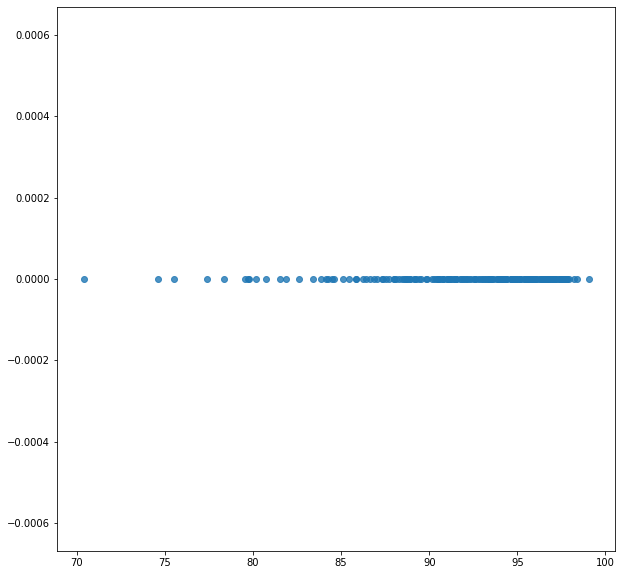

In [80]:
import seaborn as sns
sns.regplot(W_test, z_pred, data=final_df, logistic=True)